# Processing TESS data from TOI4504

In [11]:
%matplotlib inline
from process_TESS_data.process_flux_data import *
# import lightkurve as lk
# import pandas as pd
path = '../research/star_systems/TOI-4504/lightkurve/'


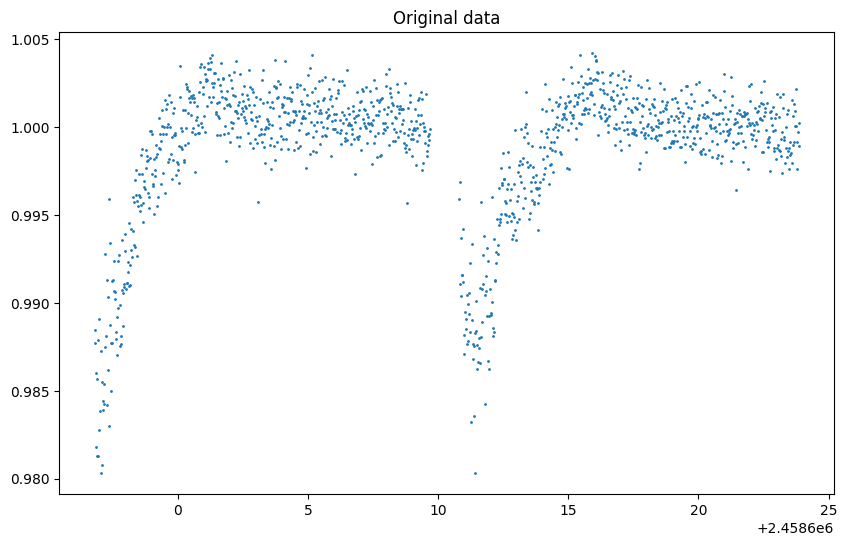

,time,flux,flux_err
0,2.458597e+06,0.988449,0.001239
1,2.458597e+06,0.987716,0.001239
2,2.458597e+06,0.986021,0.001239
3,2.458597e+06,0.981819,0.001239
4,2.458597e+06,0.981295,0.001239
...,...,...,...
1236,2.458624e+06,0.999157,0.001239
1237,2.458624e+06,0.997623,0.001239
1238,2.458624e+06,0.999709,0.001239
1239,2.458624e+06,0.998932,0.001239


In [12]:
full_path = path + "11/11_QLP_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

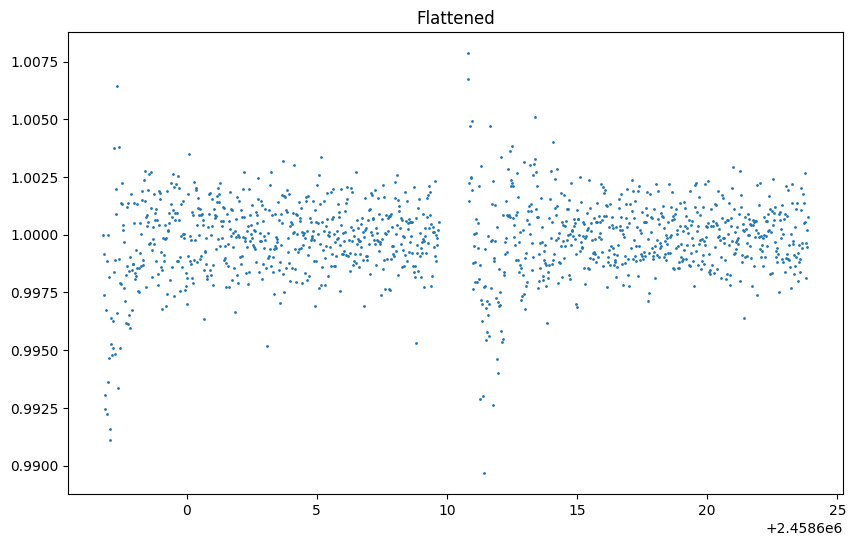

In [13]:
lc = df2lc(df)
lc = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df = lc2df(lc)
plot_this(df.time, [df.flux], ["flux"], title="Flattened")

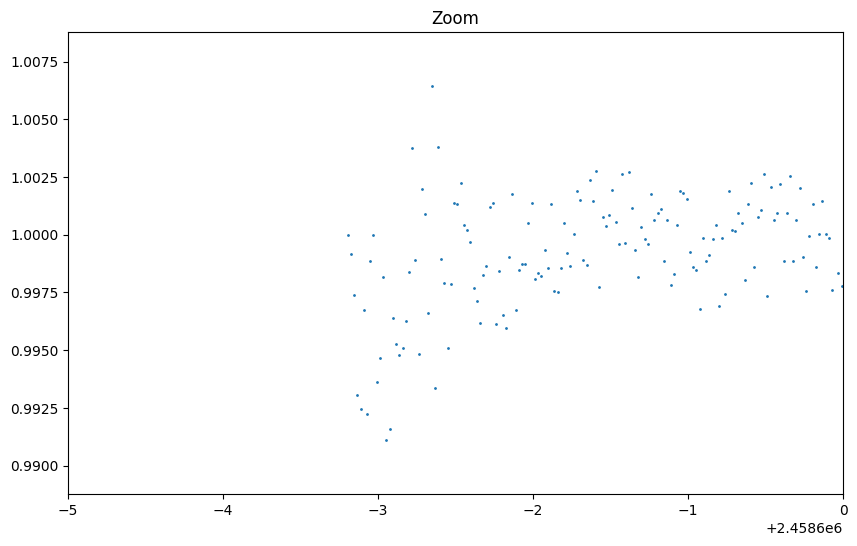

In [14]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458595, right=2458600)

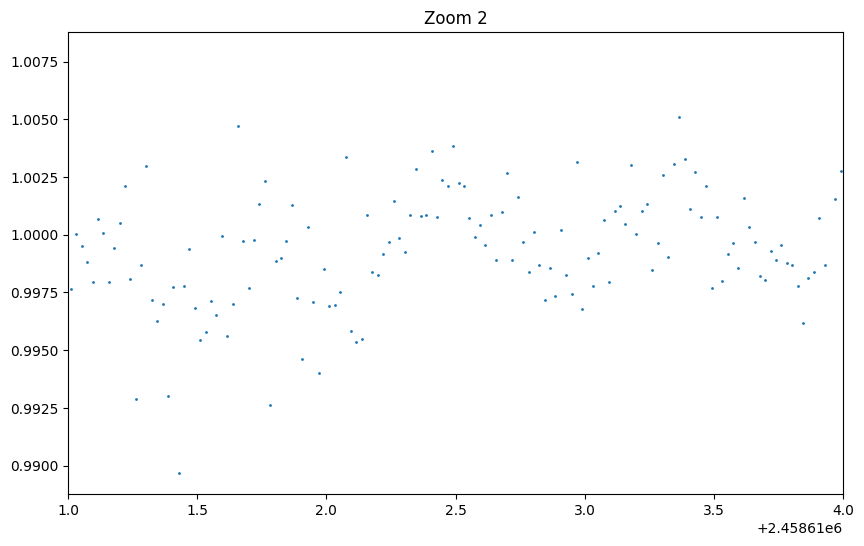

In [15]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom 2", left=2458611, right=2458614)

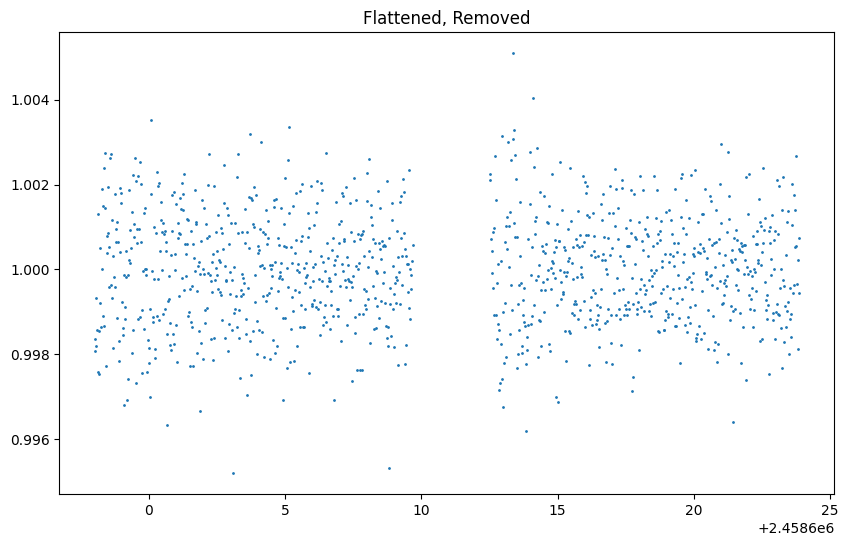

In [16]:
df = remove_from_df(df, 2458610, 2458612.5)
df = remove_from_df(df, 2458596, 2458598)
plot_this(df.time, [df.flux], ["flux"], title="Flattened, Removed")


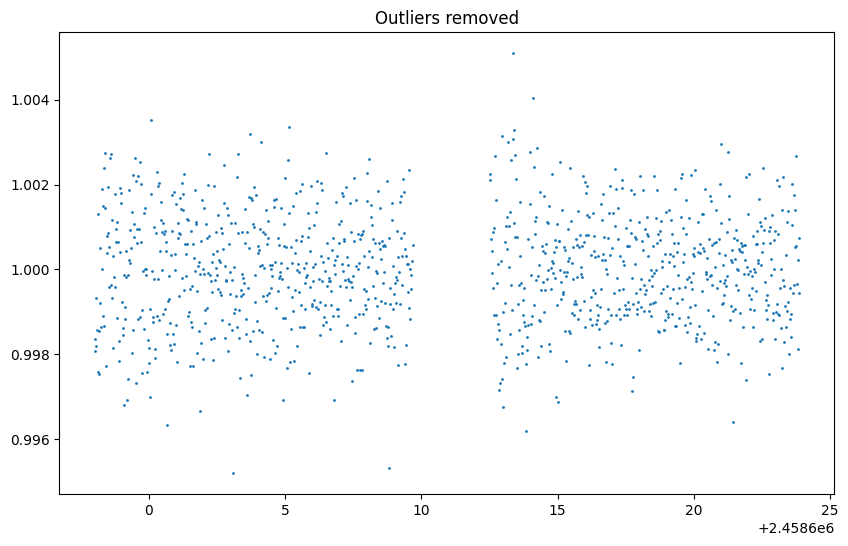

In [17]:
lc = df2lc(df)
lc = lc.remove_outliers(sigma_lower=5.5, sigma_upper=4)
df = lc2df(lc)
plot_this(df.time, [df.flux], ["flux"], title=f"Outliers removed")

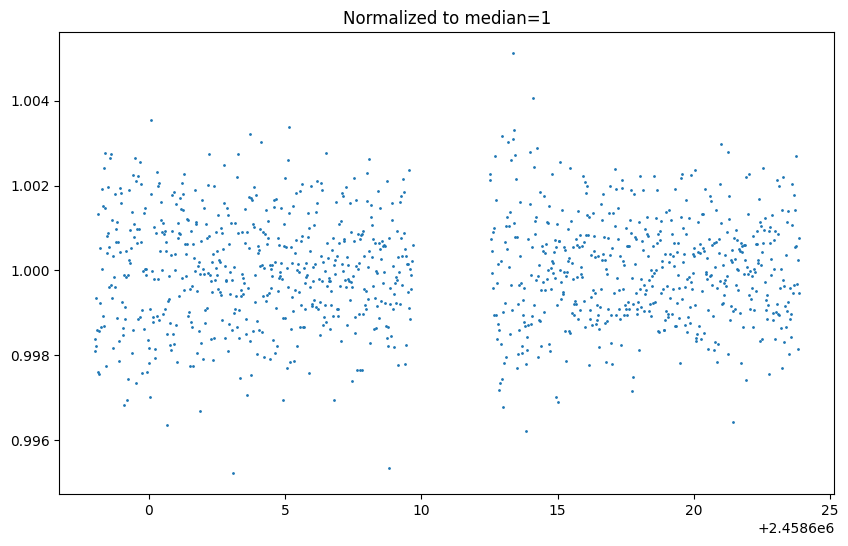

,time,flux,flux_err
0,2.458598e+06,0.998114,0.001248
1,2.458598e+06,0.998376,0.001248
2,2.458598e+06,0.998231,0.001248
3,2.458598e+06,0.999352,0.001247
4,2.458598e+06,0.998606,0.001247
...,...,...,...
1096,2.458624e+06,0.999683,0.001239
1097,2.458624e+06,0.998155,0.001239
1098,2.458624e+06,1.000249,0.001239
1099,2.458624e+06,0.999479,0.001239


In [18]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [19]:
df2csv(df, full_path[:-4]+"_p.csv")